<a href="https://colab.research.google.com/github/preetamjumech/Avila_DataSet_AdaBoost-GradientBoost-XGboost/blob/main/AML_Preetam_Saha_C22018_avila_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("avila-tr.txt",header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.266074,-0.165620,0.320980,0.483299,0.172340,0.273364,0.371178,0.929823,0.251173,0.159345,A
1,0.130292,0.870736,-3.210528,0.062493,0.261718,1.436060,1.465940,0.636203,0.282354,0.515587,A
2,-0.116585,0.069915,0.068476,-0.783147,0.261718,0.439463,-0.081827,-0.888236,-0.123005,0.582939,A
3,0.031541,0.297600,-3.210528,-0.583590,-0.721442,-0.307984,0.710932,1.051693,0.594169,-0.533994,A
4,0.229043,0.807926,-0.052442,0.082634,0.261718,0.148790,0.635431,0.051062,0.032902,-0.086652,F


In [3]:
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64

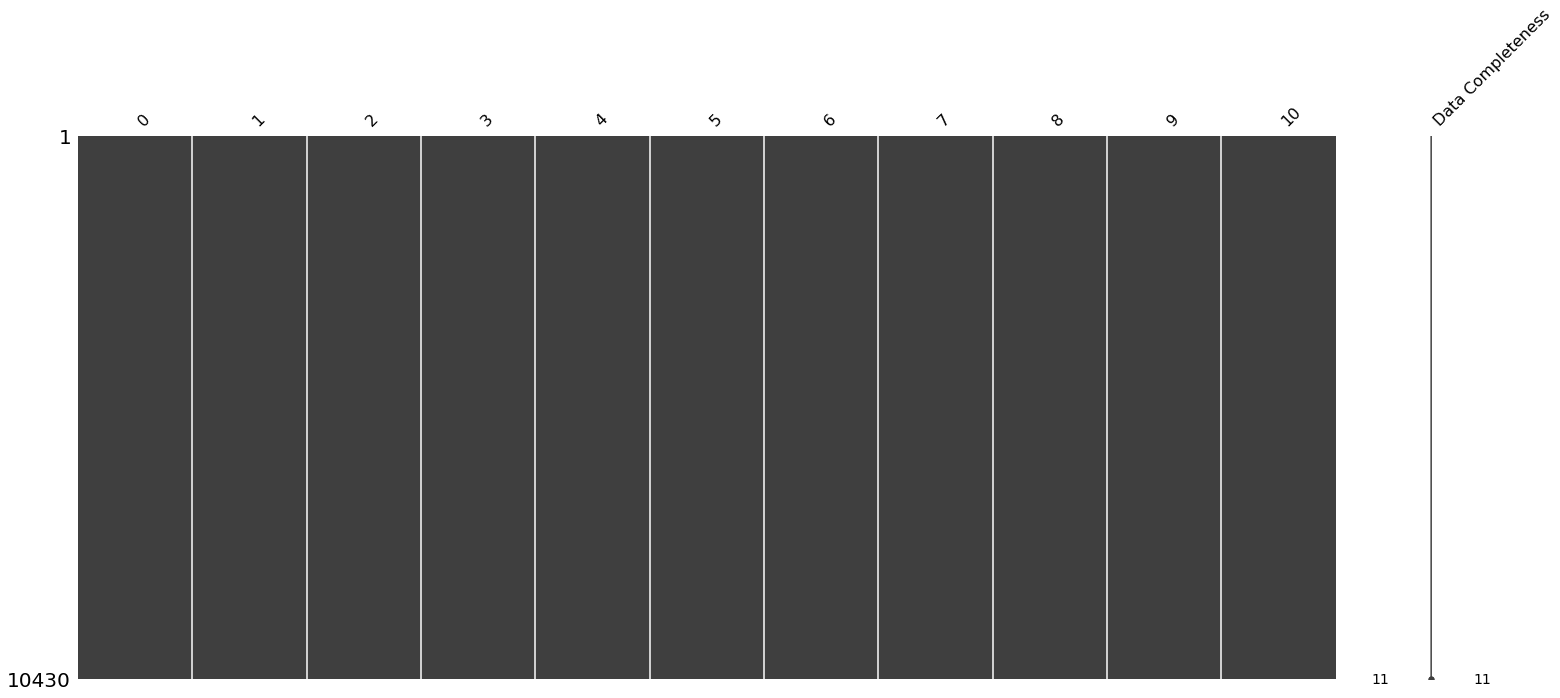

In [4]:
import missingno as msno
msno.matrix(df,labels=True,sort="descending")

In [5]:
df.describe()

,0,1,2,3,4,5,6,7,8,9
count,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000
mean,0.000852,0.033611,-0.000525,-0.002387,0.006370,0.013973,0.005605,0.010323,0.012914,0.000818
std,0.991431,3.920868,1.120202,1.008527,0.992053,1.126245,1.313754,1.003507,1.087665,1.007094
min,-3.498799,-2.426761,-3.210528,-5.440122,-4.922215,-7.450257,-11.935457,-4.247781,-5.486218,-6.719324
25%,-0.128929,-0.259834,0.064919,-0.528002,0.172340,-0.598658,-0.044076,-0.541991,-0.372457,-0.516097
50%,0.043885,-0.055704,0.217845,0.095763,0.261718,-0.058835,0.220177,0.111803,0.064084,-0.034513
75%,0.204355,0.203385,0.352988,0.658210,0.261718,0.564038,0.446679,0.654944,0.500624,0.530855
max,11.819916,386.000000,50.000000,3.987152,1.066121,53.000000,83.000000,13.173081,44.000000,4.671232


In [6]:
df.shape

(10430, 11)

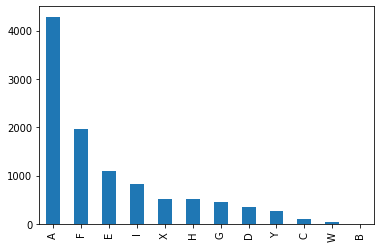

In [7]:
df[10].value_counts().plot(kind="bar")

In [8]:
X=df.iloc[:,:-1]

In [9]:
X.shape

(10430, 10)

In [10]:
y=df.iloc[:,-1]

In [11]:
y.shape

(10430,)

# AdaBoost

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold,cross_val_score,GridSearchCV
from sklearn.metrics import  confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

In [15]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
clf = GridSearchCV(dtree, 
                  {'criterion': ["gini","entropy"],
                   'max_depth':[4,5,6,7,8,10],
                    'min_samples_split':[2,3,4],
                    'max_leaf_nodes':[3,4,5,6,7,8]})
clf.fit(X_train,y_train)
print(clf.best_score_)
print(clf.best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,


0.5846107535780842
{'criterion': 'gini', 'max_depth': 5, 'max_leaf_nodes': 8, 'min_samples_split': 2}


In [16]:
tree_model = DecisionTreeClassifier(criterion='gini',
                                    max_depth=5,
                                    min_samples_split=2,
                                    max_leaf_nodes=8)

In [17]:
tree_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=8)

In [18]:
y_pred=tree_model.predict(X_test)

In [19]:
accuracy_score(y_test,y_pred)

0.5800575263662512

In [20]:
from sklearn.ensemble import AdaBoostClassifier

In [21]:
abc = AdaBoostClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5,
                                        min_samples_split=2,
                                        max_leaf_nodes=8),
                                         algorithm="SAMME.R",
                                         n_estimators=100,learning_rate=0.2)

In [22]:
abc.fit(X_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5,
                                                         max_leaf_nodes=8),
                   learning_rate=0.2, n_estimators=100)

In [23]:
y_pred1=abc.predict(X_test)

In [24]:
accuracy_score(y_test,y_pred1)

0.699424736337488

In [25]:
clf_ada = GridSearchCV(abc,{'learning_rate':[0.1,0.2,0.3],'n_estimators':[100,200,300,400]})
clf_ada.fit(X_train,y_train)
print(clf_ada.best_score_)
print(clf_ada.best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,


0.767497302337878
{'learning_rate': 0.2, 'n_estimators': 400}


In [26]:
final_ada =  AdaBoostClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5,
                                        min_samples_split=2,
                                        max_leaf_nodes=8),
                                        algorithm="SAMME.R", n_estimators=400, learning_rate=0.2)

final_ada.fit(X_train,y_train)
y_pred2=final_ada.predict(X_test)

In [27]:
accuracy_score(y_test,y_pred2)

0.7502396931927133

# Gradient Boosting

In [28]:
from sklearn.ensemble import GradientBoostingClassifier

In [29]:
gbc = GradientBoostingClassifier( max_depth=5,
                                  min_samples_split=2,
                                  max_leaf_nodes=8)

In [31]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=5, max_leaf_nodes=8)

In [32]:
y_pred3=abc.predict(X_test)

In [33]:
accuracy_score(y_test,y_pred3)

0.699424736337488

In [ ]:
# clf_gbc = GridSearchCV(abc,{'learning_rate':[0.1,0.2,0.3],'n_estimators':[100,200,300,400,500,600,700,800]})
# clf_gbc.fit(x_train,y_train)
# print(clf_gbc.best_score_)
# print(clf_gbc.best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,


0.7751690798349935
{'learning_rate': 0.1, 'n_estimators': 800}


In [34]:
clf_gbc = GridSearchCV(abc,{'learning_rate':[0.1,0.2,0.3],'n_estimators':[800,1000,1200]})
clf_gbc.fit(X_train,y_train)
print(clf_gbc.best_score_)
print(clf_gbc.best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,


0.7816410981460488
{'learning_rate': 0.1, 'n_estimators': 1200}


In [36]:
final_gbc =  GradientBoostingClassifier( max_depth=5,
                                        min_samples_split=2,
                                        max_leaf_nodes=8,
                                        n_estimators=1200, learning_rate=0.2)

final_gbc.fit(X_train,y_train)
y_pred4=final_gbc.predict(X_test)
accuracy_score(y_test,y_pred4)

0.9937679769894535

# XGBoost

In [37]:
import xgboost as xgb

In [39]:
model1 = xgb.XGBClassifier()
model2 = xgb.XGBClassifier(n_estimators=500, max_depth=8, learning_rate=0.1, subsample=0.5)

train_model1 = model1.fit(X_train, y_train)
train_model2 = model2.fit(X_train, y_train)

In [41]:
pred1 = train_model1.predict(X_test)
pred2 = train_model2.predict(X_test)
print(accuracy_score(y_test,pred1))
print(accuracy_score(y_test,pred2))

0.8748801534036433
0.9956855225311602


In [42]:
model3 = xgb.XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

In [43]:
train_model3 = model3.fit(X_train, y_train)
pred3 = train_model3.predict(X_test)
accuracy_score(y_test, pred3)

0.99712368168744

In [45]:
param_test = {
 'max_depth':[4,5,6],
 'min_child_weight':[4,5,6]
}
gsearch = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate=0.1, n_estimators=200, max_depth=5,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test, scoring='roc_auc',n_jobs=4, cv=5)

train_model4 = gsearch.fit(X_train, y_train)
pred4 = train_model4.predict(X_test)
accuracy_score(y_test, pred4),gsearch.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan]
  category=UserWarning,


(0.9851390220517737, {'max_depth': 4, 'min_child_weight': 4})

In [47]:
param_test2 = {
 'min_child_weight':[6,8,10,12]
}
gsearch2 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate=0.1, n_estimators=200, max_depth=4,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test2, scoring='roc_auc',n_jobs=4, cv=5)

train_model5 = gsearch2.fit(X_train, y_train)
pred5 = train_model5.predict(X_test)
accuracy_score(y_test, pred5),gsearch2.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan]
  category=UserWarning,


(0.9779482262703739, {'min_child_weight': 6})

In [48]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch3 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.1, n_estimators=200, max_depth=4,
 min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test3, scoring='roc_auc',n_jobs=4, cv=5)

train_model6 = gsearch3.fit(X_train, y_train)
pred6 = train_model6.predict(X_test)
accuracy_score(y_test, pred6),gsearch3.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan]
  category=UserWarning,


(0.9779482262703739, {'gamma': 0.0})

In [49]:
param_test4 = {
 'learning_rate':[i/10.0 for i in range(0,10)]
}
gsearch4 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate=0.1, n_estimators=200, max_depth=4,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test4, scoring='roc_auc',n_jobs=4, cv=5)

train_model5 = gsearch4.fit(X_train, y_train)
pred5 = train_model5.predict(X_test)
accuracy_score(y_test, pred5),gsearch4.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  category=UserWarning,


(0.40651965484180247, {'learning_rate': 0.0})

In [50]:
model7 = xgb.XGBClassifier(
 learning_rate =0.7,
 n_estimators=1000,
 max_depth=4,
 min_child_weight=6,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

train_model7 = model7.fit(X_train, y_train)
pred7 = train_model7.predict(X_test)
accuracy_score(y_test, pred7)

0.9961649089165868

In [51]:
test = pd.read_csv("avila-ts.txt",header=None)

In [52]:
X_final=test.drop(10,axis=1)
y_final=test[10]

In [53]:
y_test_pred_adb=final_ada.predict(X_final)
accuracy_score(y_final,y_test_pred_adb)

0.7468621251317429

In [54]:
y_test_pred_gbc=final_gbc.predict(X_final)
accuracy_score(y_final,y_test_pred_gbc)

0.996550732969244

In [55]:
y_test_pred_xgb=train_model3.predict(X_final)
accuracy_score(y_final,y_test_pred_xgb)

0.9985628054038517

# XGBoost is the best 